## Diabet kasalligiga tashxis qo'yish.

<h4>Ustunlar</h4>
Pregnancies: homilador bo'lish soni <br>
Glucose: glyukozaga test natijasi <br>
BloodPressure: diastolik qon bosimi (mm Hg) <br>
SkinThickness: Triceps teri burmasining qalinligi (mm) <br>
Insulin: 2 soatlik sarum insulini (mu U/ml) <br>
BMI: Tana massasi indeksi (vazn kg / (m bo'yi) ^ 2) <br>
DiabetesPedigreeFunction: diabetning naslchilik funktsiyasi <br>
Age: Yosh (yil) <br>
Outcome: Class (0 - diabet yo'q, 1 - diabet) <br>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, jaccard_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [7]:
df = pd.read_csv("./diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
df.shape

(768, 9)

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

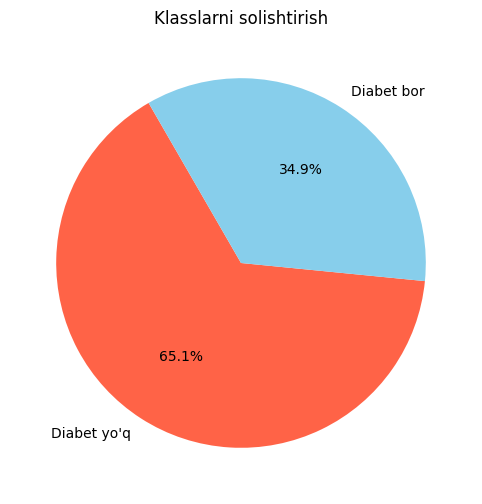

In [22]:
classes = df['Outcome'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(classes,labels=['Diabet yo\'q','Diabet bor'],autopct='%1.1f%%',startangle=120,colors=['tomato','skyblue'])
plt.title("Klasslarni solishtirish")
plt.show()

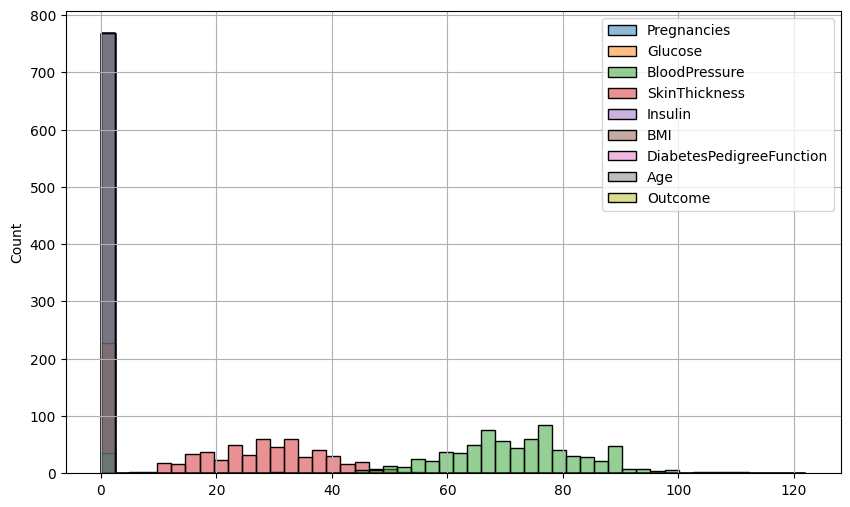

In [42]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,bins=50)
plt.grid()
plt.show()

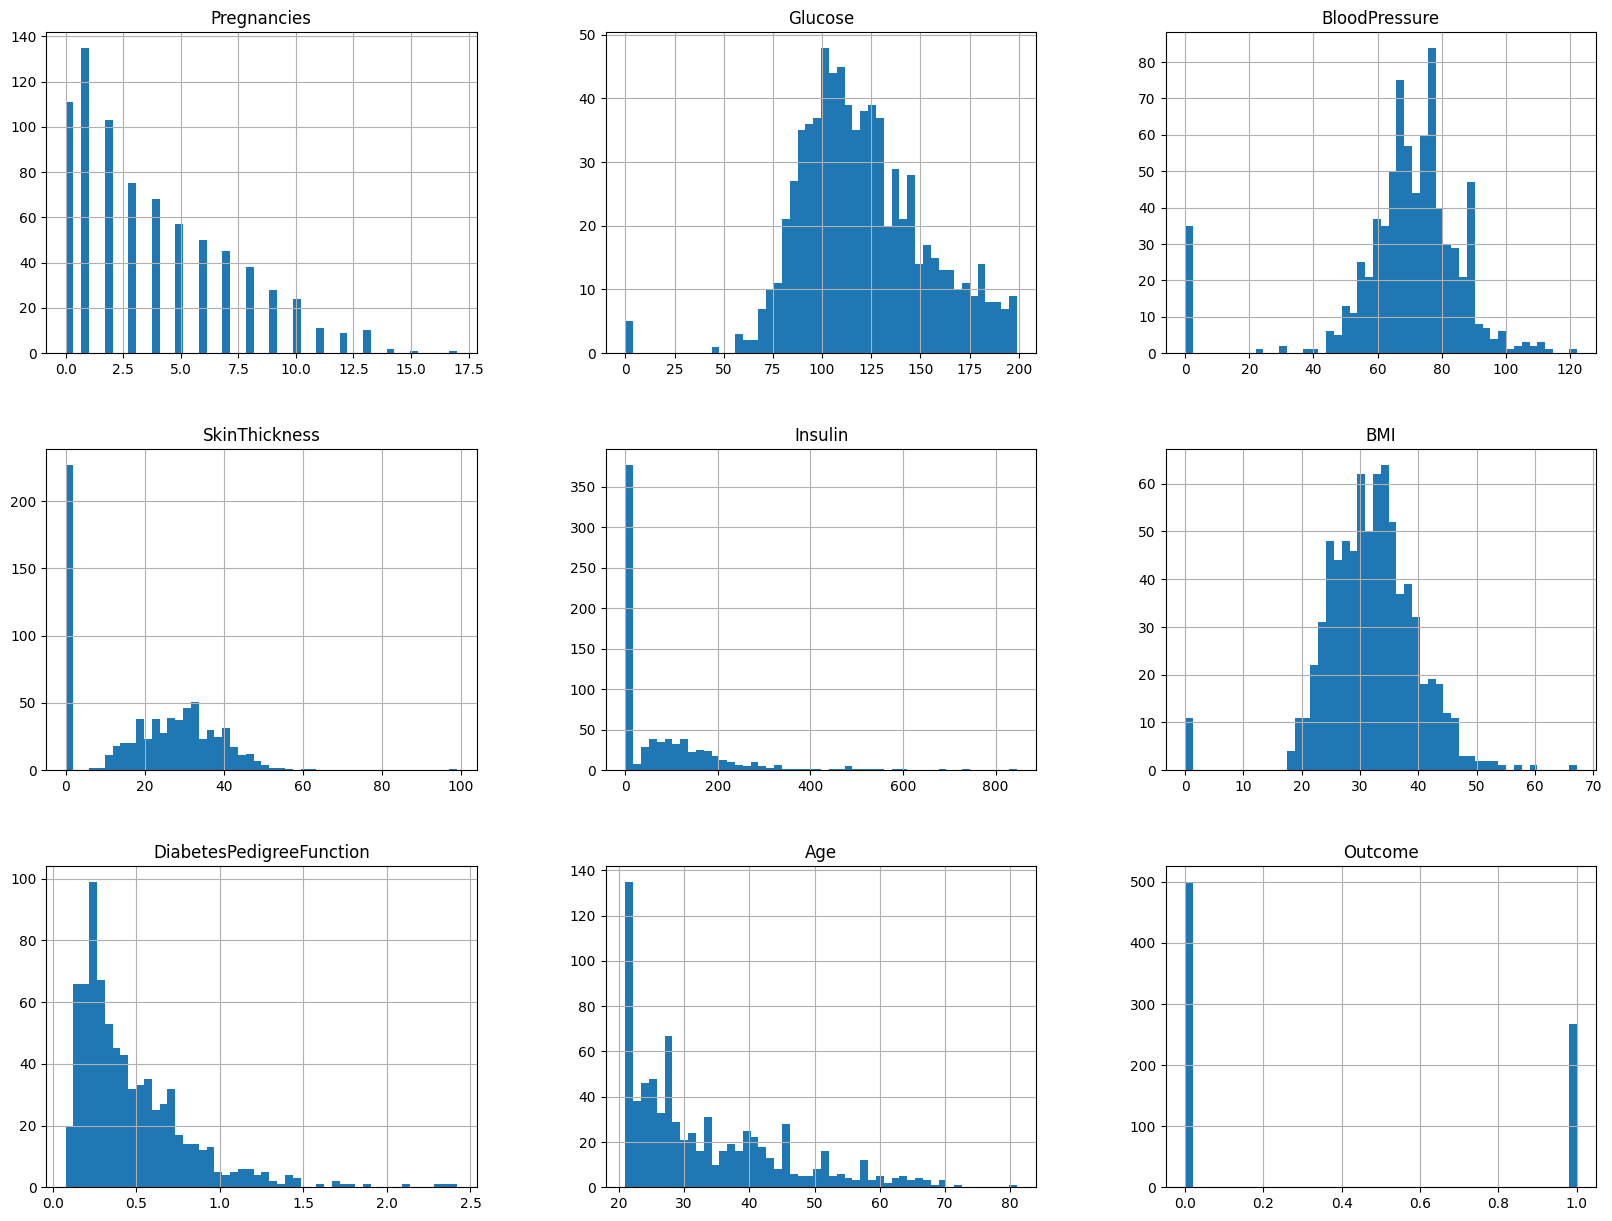

In [28]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [34]:
df.corrwith(df['Outcome']).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

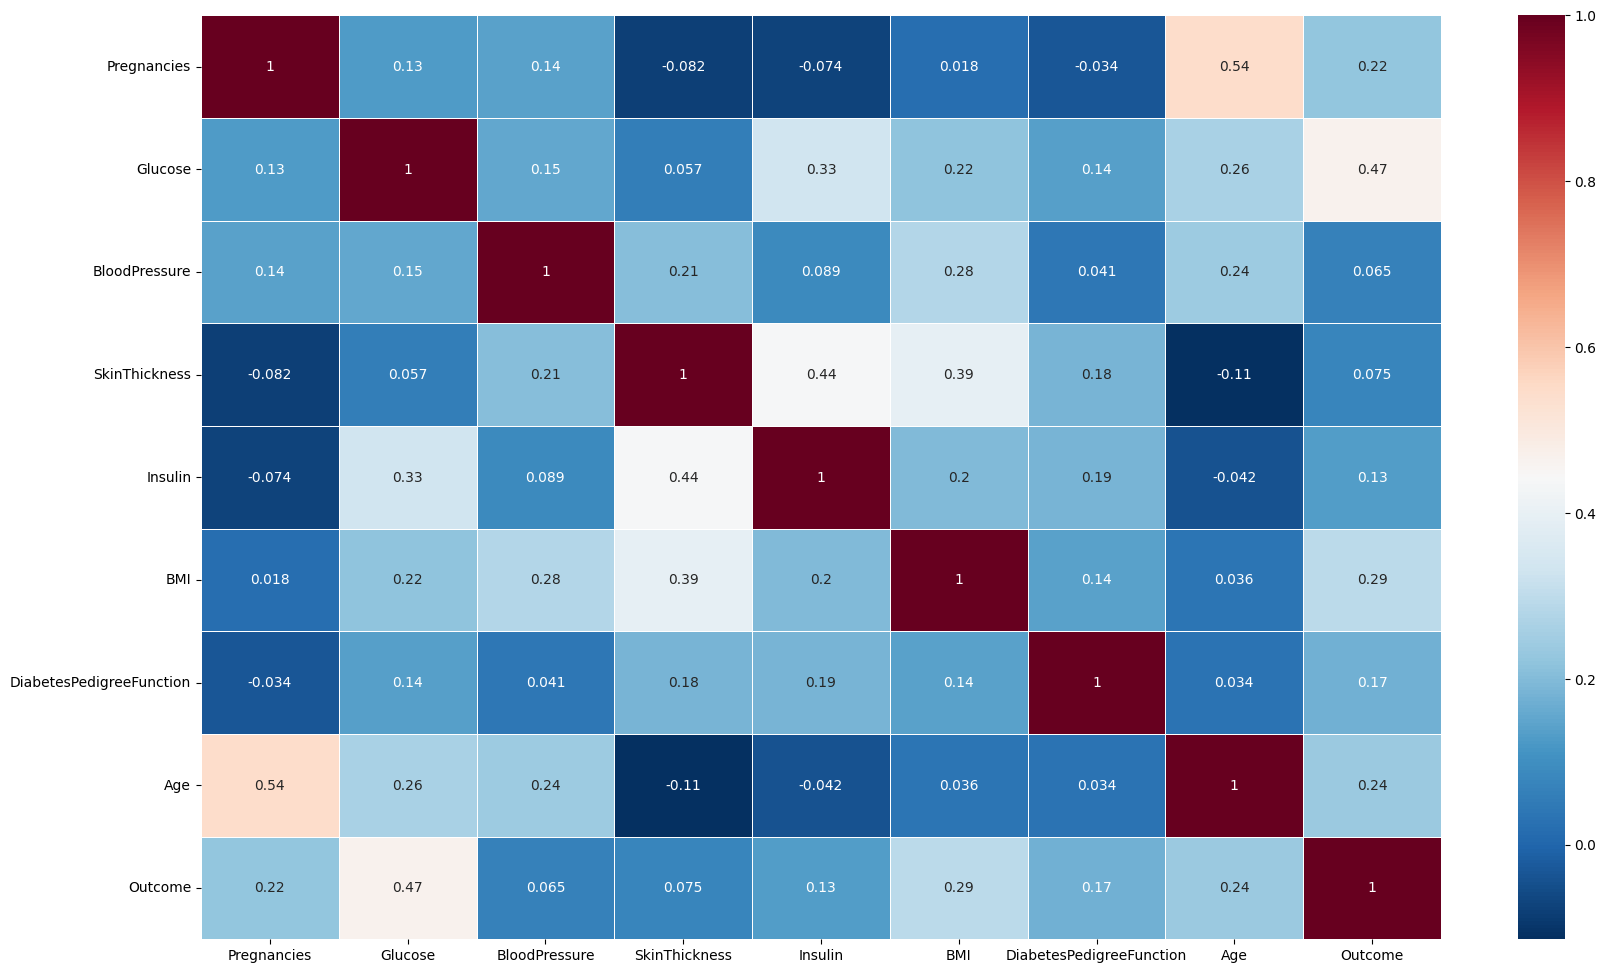

In [29]:
fig, ax = plt.subplots(figsize = (20, 12)) 
ax = sns.heatmap(df.corr(),cmap='RdBu_r',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show()

In [32]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
scaler = MinMaxScaler()

In [80]:
columns = ['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age']
df[columns] = scaler.fit_transform(df[columns])

In [81]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,72,35,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,66,29,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,64,0,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,66,23,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,40,35,0.198582,0.642325,0.943638,0.200000,1.0


In [82]:
X = df[['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction']]
X.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction
0,0.352941,0.743719,0.000000,0.500745,0.234415
1,0.058824,0.427136,0.000000,0.396423,0.116567
2,0.470588,0.919598,0.000000,0.347243,0.253629
3,0.058824,0.447236,0.111111,0.418778,0.038002
4,0.000000,0.688442,0.198582,0.642325,0.943638


In [40]:
y = df['Outcome']
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### KNN alogoritm

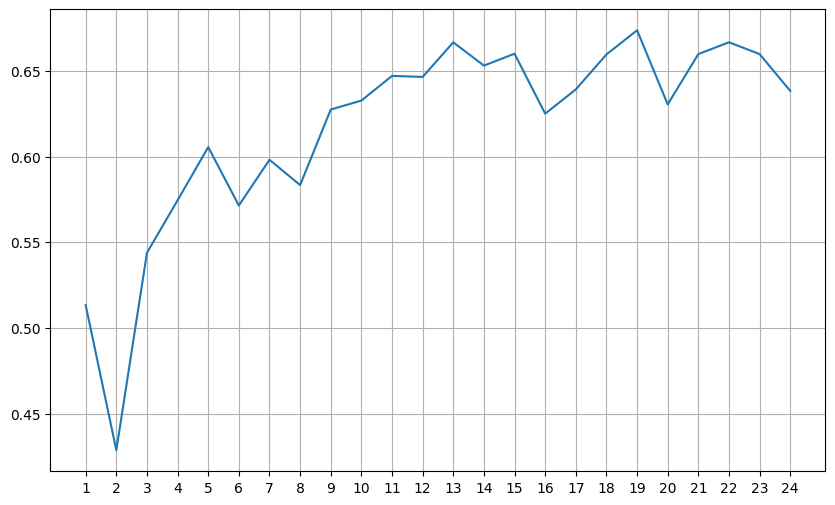

In [44]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [47]:
model_KNN = KNeighborsClassifier(n_neighbors=19)
model_KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [48]:
predict_KNN = model_KNN.predict(X_test)

In [52]:
def display_accuracy(y_test,y_pred):
    print(f"Jaccard Score: {jaccard_score(y_test,y_pred)*100:.2f} %")
    print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f} %")
    print(f"F1 score Score: {f1_score(y_test,y_pred)*100:.2f} %")
    print(f"Precision Score: {precision_score(y_test,y_pred)*100:.2f} %")
    print(f"Recall Score: {recall_score(y_test,y_pred)*100:.2f} %")

In [53]:
display_accuracy(y_test,predict_KNN)

Jaccard Score: 50.79 %
Accuracy Score: 79.87 %
F1 score Score: 67.37 %
Precision Score: 80.00 %
Recall Score: 58.18 %


In [54]:
print(classification_report(y_test,predict_KNN))

              precision    recall  f1-score   support

         0.0       0.80      0.92      0.85        99
         1.0       0.80      0.58      0.67        55

    accuracy                           0.80       154
   macro avg       0.80      0.75      0.76       154
weighted avg       0.80      0.80      0.79       154



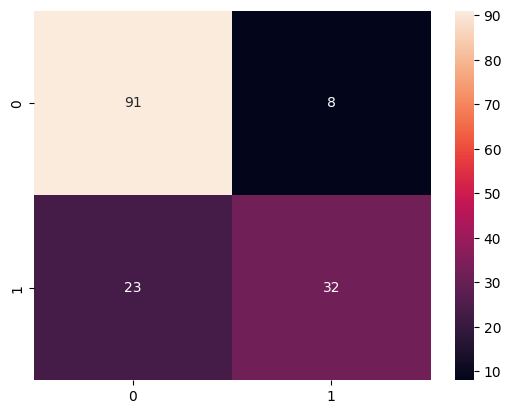

In [56]:
cm = confusion_matrix(y_test,predict_KNN)
sns.heatmap(cm,annot=True)
plt.show()

## Decision Tree

In [57]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
predict_DT = model_DT.predict(X_test)

In [60]:
display_accuracy(y_test,predict_DT)

Jaccard Score: 39.76 %
Accuracy Score: 67.53 %
F1 score Score: 56.90 %
Precision Score: 54.10 %
Recall Score: 60.00 %


In [61]:
print(classification_report(y_test,predict_DT))

              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74        99
         1.0       0.54      0.60      0.57        55

    accuracy                           0.68       154
   macro avg       0.65      0.66      0.65       154
weighted avg       0.68      0.68      0.68       154



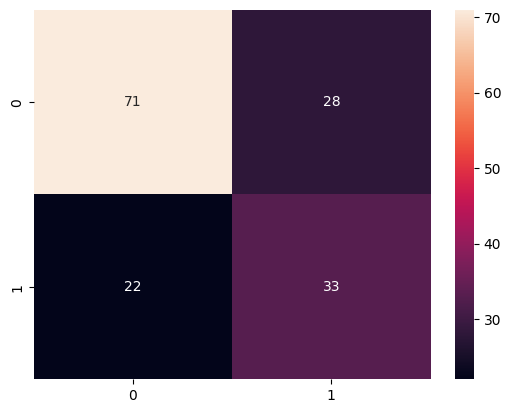

In [62]:
cm = confusion_matrix(y_test,predict_DT)
sns.heatmap(cm,annot=True)
plt.show()

## Random Forest

In [63]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train,y_train)

RandomForestClassifier()

In [64]:
predict_RF = model_RF.predict(X_test)

In [65]:
display_accuracy(y_test,predict_RF)

Jaccard Score: 49.33 %
Accuracy Score: 75.32 %
F1 score Score: 66.07 %
Precision Score: 64.91 %
Recall Score: 67.27 %


In [66]:
print(classification_report(y_test,predict_RF))

              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81        99
         1.0       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



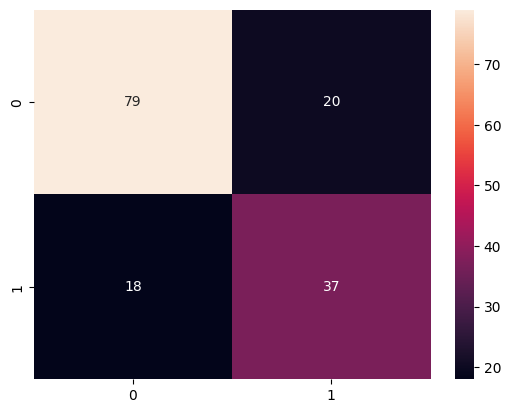

In [67]:
cm = confusion_matrix(y_test,predict_RF)
sns.heatmap(cm,annot=True)
plt.show()

## Logistic Regression

In [69]:
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)

LogisticRegression()

In [70]:
predict_LR = model_LR.predict(X_test)

In [71]:
display_accuracy(y_test,predict_LR)

Jaccard Score: 50.79 %
Accuracy Score: 79.87 %
F1 score Score: 67.37 %
Precision Score: 80.00 %
Recall Score: 58.18 %


In [72]:
print(classification_report(y_test,predict_LR))

              precision    recall  f1-score   support

         0.0       0.80      0.92      0.85        99
         1.0       0.80      0.58      0.67        55

    accuracy                           0.80       154
   macro avg       0.80      0.75      0.76       154
weighted avg       0.80      0.80      0.79       154



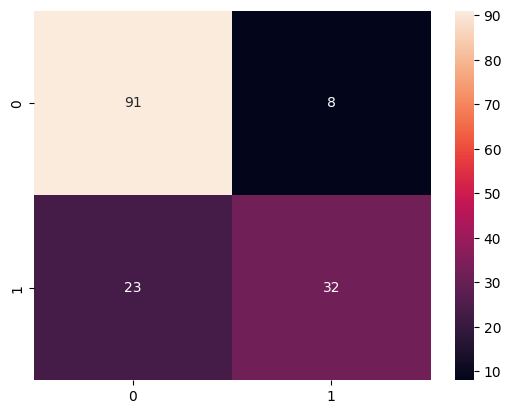

In [73]:
cm = confusion_matrix(y_test,predict_LR)
sns.heatmap(cm,annot=True)
plt.show()

### SVM 

In [75]:
model_SVM = SVC()
model_SVM.fit(X_train,y_train)

SVC()

In [76]:
predict_SVM = model_SVM.predict(X_test)

In [77]:
display_accuracy(y_test,predict_SVM)

Jaccard Score: 53.03 %
Accuracy Score: 79.87 %
F1 score Score: 69.31 %
Precision Score: 76.09 %
Recall Score: 63.64 %


In [78]:
print(classification_report(y_test,predict_SVM))

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85        99
         1.0       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



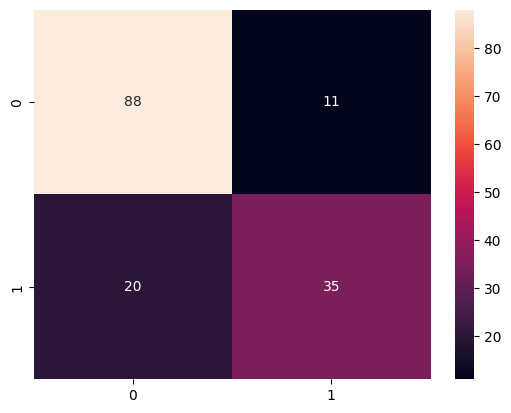

In [79]:
cm = confusion_matrix(y_test,predict_SVM)
sns.heatmap(cm,annot=True)
plt.show()

<h4>Eng yaxshi algoritmlar</h4>
KNN Accuracy: 79.87 % <br>
Logestic Regression Accuracy: 79.87 % <br>
SVM Accuracy: 79.87 % <br>

In [86]:
import pickle

with open("model_SVM.pkl","wb") as file:
    pickle.dump(model_SVM,file)